In [1]:
import pandas as pd

dataframe= pd.read_csv(r'C:\Users\Peng\Desktop\New folder\PreScreen_r3\ingredient.csv')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


In [3]:
dataframe

,"genotype(TypeA=0,TypeB=1)",a,b,c,d,e,f,g,h,i
0,0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
209,0,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16
210,1,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32
211,0,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00
212,1,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22


In [4]:
test=dataframe.to_numpy()
#test = dataframe.values
X = test[:, 1:9]
y = test[:, 0]
x_train, x_test,y_train, y_test = train_test_split(X, y,test_size=0.2,random_state = 0)
print(X.shape)
print(y.shape)

(214, 8)
(214,)


In [5]:
x = test[:, 1]
print(x)

[1.51735 1.53125 1.523   1.51768 1.51813 1.51721 1.51596 1.51316 1.51747
 1.52121 1.51736 1.5164  1.51977 1.51806 1.51769 1.52058 1.51613 1.5241
 1.52081 1.51824 1.51832 1.51793 1.51556 1.51915 1.51514 1.51766 1.5159
 1.51754 1.52222 1.52227 1.51969 1.52101 1.51658 1.51646 1.51409 1.51761
 1.5169  1.51711 1.52099 1.52127 1.51571 1.51916 1.52777 1.5167  1.52043
 1.51708 1.51131 1.5186  1.5164  1.51727 1.51593 1.51829 1.51776 1.5166
 1.51588 1.51567 1.51837 1.51651 1.51593 1.51838 1.51627 1.5161  1.51811
 1.51743 1.51589 1.52223 1.51666 1.51663 1.51934 1.51508 1.51869 1.51609
 1.5182  1.51851 1.51789 1.51778 1.5161  1.51911 1.51687 1.51852 1.5221
 1.51784 1.5232  1.5173  1.51617 1.51594 1.51966 1.52365 1.51926 1.51655
 1.51847 1.51779 1.51625 1.51665 1.51755 1.51743 1.52247 1.51754 1.51786
 1.51623 1.51909 1.52475 1.51763 1.51645 1.51646 1.52213 1.51574 1.51618
 1.51841 1.52667 1.51779 1.51797 1.51655 1.51769 1.51685 1.51711 1.51905
 1.5159  1.51674 1.51969 1.51872 1.52664 1.52152 1.5172

In [6]:
knn_classifier = KNeighborsClassifier(n_neighbors=1)

In [14]:
from sklearn.metrics import confusion_matrix
knn_classifier.fit(x_train, y_train)
knn_y_pred = knn_classifier.predict(x_train)

print("knn Confusion Matrix Result")
print(confusion_matrix(knn_y_pred, y_train))

knn Confusion Matrix Result
[[80  1]
 [ 0 90]]


Model training score: 0.5116279069767442 
Training took 0.011 seconds
Prediction took 0.017 seconds


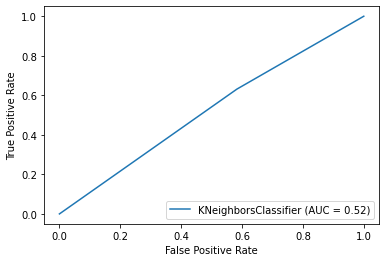

Accuracy: 0.51 (51.16%)
Precision: 0.46 (46.15%)
              precision    recall  f1-score   support

       TypeA       0.59      0.42      0.49        24
       TypeB       0.46      0.63      0.53        19

    accuracy                           0.51        43
   macro avg       0.52      0.52      0.51        43
weighted avg       0.53      0.51      0.51        43



In [8]:
# Pass through 80% dataset into svm algorithms for training and print out the time taken.
pre = time()
knn_classifier.fit(x_train, y_train)
dc_score = knn_classifier.score(x_test,y_test)
print(f'Model training score: {dc_score} ')
post = time()
nb_train_time = round(float(post - pre), 3)
print(f'Training took {nb_train_time} seconds')
# Prediction happen and using the 20% test data.
y_pred = knn_classifier.predict(x_test)
post = time()
nb_predict_time = round(float(post - pre), 3)
print(f'Prediction took {nb_predict_time} seconds')


nb_acc = metrics.accuracy_score(y_test, y_pred)
nb_prec = metrics.precision_score(y_test, y_pred, zero_division = 0)



target_names = ['TypeA', 'TypeB']
report=classification_report(y_test, y_pred, target_names=target_names, zero_division = 0)



metrics.plot_roc_curve(knn_classifier, x_test, y_test)  
plt.show()
print(f'Accuracy: {nb_acc:.2f} ({nb_acc * 100:.2f}%)\nPrecision: {nb_prec:.2f} ({nb_prec * 100:.2f}%)')
print(report)

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

f=10

scores = cross_val_score(knn_classifier, X, y, cv=f)

percentage = "{:.1%}".format(scores.mean())


print(f'Cross validation result of KNN by using {f} fold, scores: {scores}')
# 0.2 = 0.xx, 0.3 = 0.xxx decimal places
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Accuracy: " + percentage)

Cross validation result of KNN by using 10 fold, scores: [0.40909091 0.68181818 0.5        0.5        0.38095238 0.52380952
 0.47619048 0.47619048 0.66666667 0.57142857]
Accuracy: 0.52 (+/- 0.19)
Accuracy: 51.9%


In [10]:
test=dataframe.to_numpy()
#test = dataframe.values
X = test[:, 4:6]
y = test[:, 0]
x_train, x_test,y_train, y_test = train_test_split(X, y,test_size=0.2,random_state = 0)
print(X.shape)
print(y.shape)

(214, 2)
(214,)


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


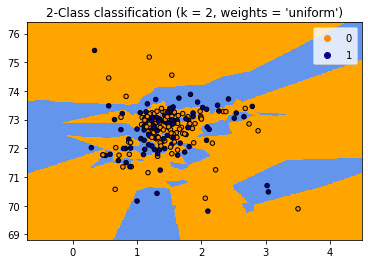

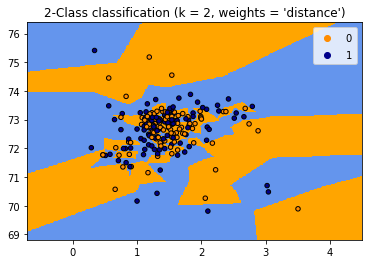

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 2

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    
    plt.legend(*scatter.legend_elements())

plt.show()

In [12]:
knn_classifier = KNeighborsClassifier(n_neighbors=1)
#predicted = clf.predict(X_test)
knn_classifier.fit(x_train, y_train)



KNeighborsClassifier(n_neighbors=1)

In [13]:
tnx=([[1.43,73.15]],[[1.33,72.11]],[[2.55,69.12]])

result = []

for t in tnx:
  for x in t:
    result.append(x)
print(result)

#nx=list(tnx)

def predict_model():
  
  newx = knn_classifier.predict(result)
  
  for i in range(len(newx)):
    print("new_observation=%s, predict_outcome=%s" % (result[i], newx[i]))

predict_model()

[[1.43, 73.15], [1.33, 72.11], [2.55, 69.12]]
new_observation=[1.43, 73.15], predict_outcome=1.0
new_observation=[1.33, 72.11], predict_outcome=0.0
new_observation=[2.55, 69.12], predict_outcome=1.0
